The data is quite clean and the new features have been included. I will proceed to the next step. That is, preprocessing the data. 

<a id="4"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DATA PREPROCESSING</p>

In this section, I will be preprocessing the data to perform clustering operations.

**The following steps are applied to preprocess the data:**

* Label encoding the categorical features
* Scaling the features using the standard scaler 
* Creating a subset dataframe for dimensionality reduction

In [1]:

#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
import plotly.express as px
import mlflow


In [2]:
version = "v1.0"
data_url = r"D:\Users\ameni\OneDrive\Bureau\MLOPS Project\Data\clean_data.csv"

In [3]:
import os
os.environ['MLFLOW_TRACKING_USERNAME']= "amenichaabouni248"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "fa8a3b911c75ea75b053cc1f07823b4922ed8a07"

In [4]:
#setup mlflow
mlflow.set_tracking_uri('https://dagshub.com/amenichaabouni248/mlops_dynamic_pricing.mlflow') #your mlfow tracking uri
mlflow.set_experiment("mlops-id-experiment")

MlflowException: API request to endpoint /api/2.0/mlflow/experiments/get-by-name failed with error code 404 != 200. Response body: ''

In [8]:
data=pd.read_csv(r"D:\Users\ameni\OneDrive\Bureau\MLOPS Project\Data\clean_data.csv")
data.drop(columns="Unnamed: 0",axis=1,inplace=True)

#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [ ]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [5]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

NameError: name 'data' is not defined

In [6]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()


Dataframe to be used for further modelling:


NameError: name 'scaled_ds' is not defined

In [7]:
scaled_ds.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Customer_For', 'Age', 'Spent', 'Living_With',
       'Children', 'Family_Size', 'Is_Parent'],
      dtype='object')

In [9]:
data["Freqeuncy"]=data["NumWebPurchases"]+data["NumCatalogPurchases"]+data["NumStorePurchases"]


In [10]:
data.to_csv("data.csv")

In [7]:
scaled_ds["Freqeuncy"]=scaled_ds["NumWebPurchases"]+scaled_ds["NumCatalogPurchases"]+scaled_ds["NumStorePurchases"]

NameError: name 'data' is not defined

<a id="6"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">CLUSTERING</p>

Now that I have reduced the attributes to three dimensions, I will be performing clustering via Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method.  It involves merging examples until the desired number of clusters is achieved.

**Steps involved in the Clustering**
* Elbow Method to determine the number of clusters to be formed
* Clustering via Agglomerative Clustering
* Examining the clusters formed via scatter plot

In [11]:
clusters_data = scaled_ds[['Recency', 'Freqeuncy', 'Spent']]


Elbow Method to determine the number of clusters to be formed:


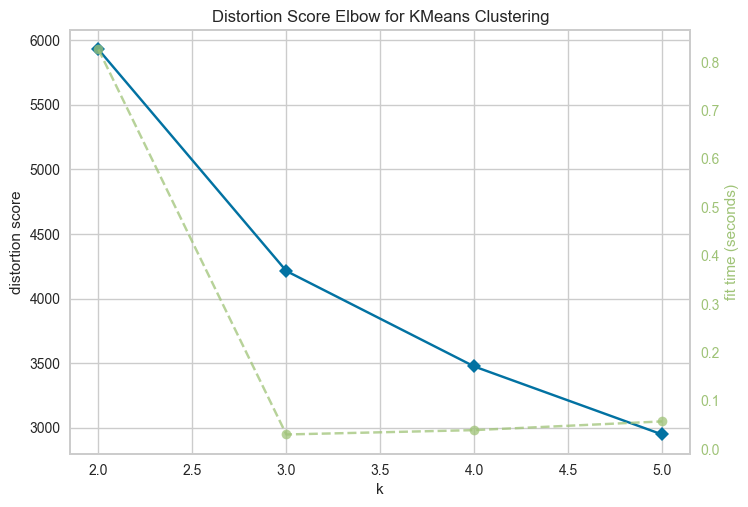

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')

Elbow_M = KElbowVisualizer(KMeans(), k=5)
Elbow_M.fit(clusters_data)
Elbow_M.show()

<a id="7"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">KMeans MODEL</p>


In [81]:
mlflow.sklearn.autolog(disable=True)

In [99]:
from sklearn import metrics
from sklearn.metrics import silhouette_score

with mlflow.start_run(run_name='KMEANS'):
    mlflow.log_param("data_url",data_url)
    mlflow.log_param("data_version",version)
    mlflow.log_param("input_rows",data.shape[0])
    mlflow.log_param("input_cols",data.shape[1])
    #model fitting and training
    kmeans = KMeans(n_clusters=4, init = "k-means++", random_state = 42)
    mlflow.set_tag(key= "model",value="KMEANS")
    params = Elbow_M.get_params()
    mlflow.log_params(params)
    kmeans.fit(clusters_data)
    y_pred = kmeans.fit_predict(clusters_data)
    silhouette = silhouette_score(clusters_data, y_pred)
    mlflow.log_metric("Silhouette_Score", silhouette)
    mlflow.sklearn.log_model(kmeans,artifact_path="ML_models")


In [13]:
kmeans = KMeans(n_clusters=4, init = "k-means++", random_state = 42)
params = Elbow_M.get_params()
kmeans.fit(clusters_data)

KMeans(n_clusters=4, random_state=42)

In [14]:
scaled_ds['segment'] = kmeans.labels_
scaled_ds

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Freqeuncy,segment
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,0.692181,1.527721,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139,3.374658,0
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.132545,-1.189011,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456,-2.868920,3
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.544908,-0.206048,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139,2.487409,0
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,0.279818,-1.060584,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456,-2.230480,3
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,-0.132545,-0.951915,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456,0.504113,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,-0.893586,0.430444,-0.822754,0.908097,-0.104347,1.197084,0.419540,0.066770,0.079461,2.213965,...,-0.132545,0.134778,0.163575,1.218061,0.740959,0.069987,0.449070,0.632456,1.347787,2
2208,0.571657,0.560123,2.902796,0.908097,0.241237,0.298631,-0.662628,-0.611184,-0.687527,-0.658360,...,0.692181,-1.653326,1.958607,-0.271040,0.740959,2.739158,2.656499,0.632456,0.949044,2
2209,-0.893586,0.233347,-0.822754,-0.929699,1.450778,1.787156,0.545373,0.222878,-0.103155,-0.366260,...,0.279818,-0.981552,-1.033114,1.052052,-1.349603,-1.264598,-1.758359,-1.581139,1.563559,2
2210,0.571657,0.803172,-0.822754,0.908097,-1.417564,0.363866,0.092373,0.209498,0.773403,0.071892,...,-0.957271,-0.976612,1.103830,0.391336,0.740959,0.069987,0.449070,0.632456,2.782882,0


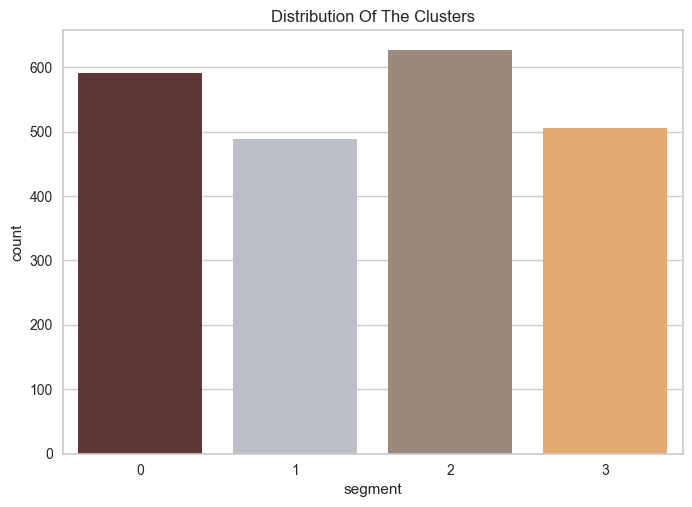

In [15]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=scaled_ds['segment'], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [16]:
scaled_ds.groupby('segment')[['Recency', 'Freqeuncy', 'Spent']].agg(['mean', 'median', 'max', 'min'])

Recency                              Freqeuncy                      \
             mean    median       max      min      mean    median       max   
segment                                                                        
0        0.010848 -0.000672  1.727245 -1.69403  3.143384  3.010379  6.622633   
1        0.902651  0.966962  1.727245 -0.03523 -2.267802 -2.253574 -0.429799   
2       -0.028164  0.033887  1.727245 -1.69403  0.723696  0.754704  2.133548   
3       -0.850151 -0.864630  0.068445 -1.69403 -2.375135 -2.538153 -0.486881   

                      Spent                                
              min      mean    median       max       min  
segment                                                    
0        1.346956  1.150362  1.071973  3.183607 -0.548275  
1       -4.190681 -0.850737 -0.900214  0.321612 -0.999819  
2       -1.205497  0.280633  0.002875  2.730402 -0.578156  
3       -4.190681 -0.868636 -0.910174  0.172204 -0.998159

**Recency, Frequency & Monetary shows the clusters pattern**
* group 2: Low spending & Low Frequency & High Recency => **Zappeur**
* group 0: High spending & High Frequency & Low Recency => **Fidéle**
* group 1: Low spending & High Frequency & High Recency => **Potentiel**
* group 3: High spending & Low Frequency & High Recency => **Habituel** 

In [17]:
#A verifier
seg = {
    2: 'zappeur',
    0: 'fidele',
    3: 'habituel',
    1: 'potentiel'
}

scaled_ds['segment_name'] = scaled_ds['segment'].replace(seg, regex=True)
scaled_ds.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Freqeuncy,segment,segment_name
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,1.527721,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139,3.374658,0,fidele
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-1.189011,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456,-2.868920,3,habituel
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.206048,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139,2.487409,0,fidele
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-1.060584,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456,-2.230480,3,habituel
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,-0.951915,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456,0.504113,2,zappeur


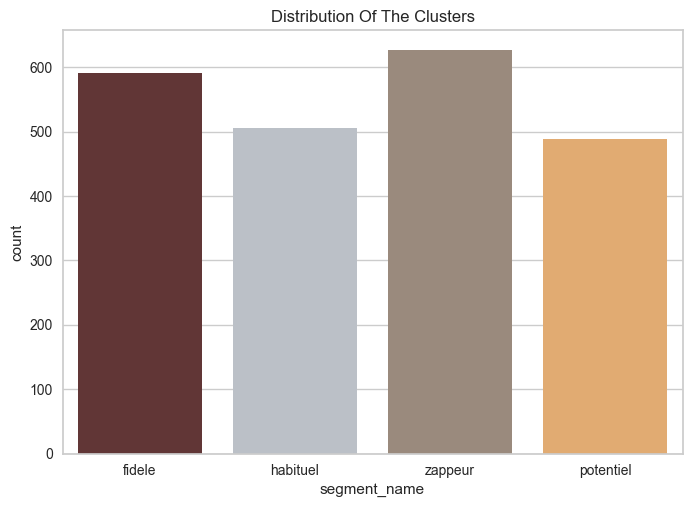

In [105]:
pl = sns.countplot(x=scaled_ds['segment_name'], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [18]:
scaled_ds.to_csv("final_data.csv")

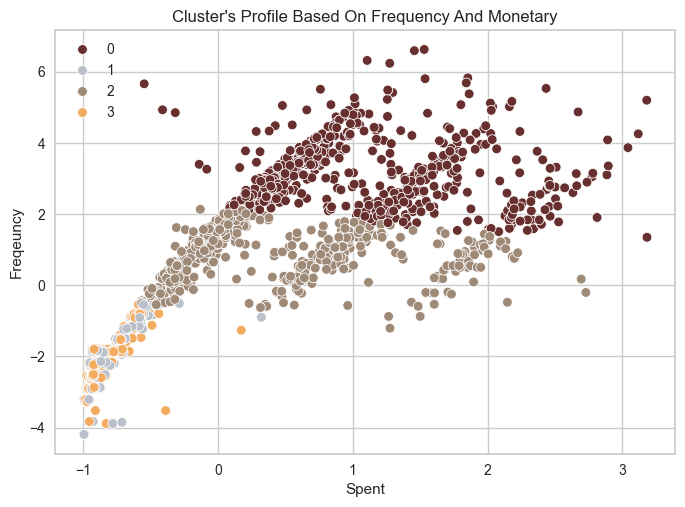

In [106]:
pl = sns.scatterplot(data = scaled_ds,x=scaled_ds["Spent"], y=scaled_ds["Freqeuncy"],hue=scaled_ds["segment"], palette= pal)
pl.set_title("Cluster's Profile Based On Frequency And Monetary")
plt.legend()
plt.show()

<a id="7"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Agglomerative MODEL</p>


The above cell indicates that four will be an optimal number of clusters for this data. 
Next, we will be fitting the Agglomerative Clustering Model to get the final clusters. 

In [91]:
with mlflow.start_run(run_name='Agglomerative'):
    mlflow.log_param("data_url",data_url)
    mlflow.log_param("data_version",version)
    mlflow.log_param("input_rows",data.shape[0])
    mlflow.log_param("input_cols",data.shape[1])
    #model fitting and training
    AC = AgglomerativeClustering(n_clusters=4)
    mlflow.set_tag(key= "model",value="Agglomerative")
    params = Elbow_M.get_params()
    mlflow.log_params(params)
    AC.fit_predict(clusters_data)
    y_pred = kmeans.fit_predict(clusters_data)
    silhouette = silhouette_score(clusters_data, y_pred)
    mlflow.log_metric("Silhouette_Score", silhouette)
    mlflow.sklearn.log_model(AC,artifact_path="ML_models")


2023/10/12 00:52:08 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


In [92]:
AC = AgglomerativeClustering(n_clusters=4)
params = Elbow_M.get_params()
yhat_AC=AC.fit_predict(clusters_data)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

To examine the clusters formed let's have a look at the 3-D distribution of the clusters. 

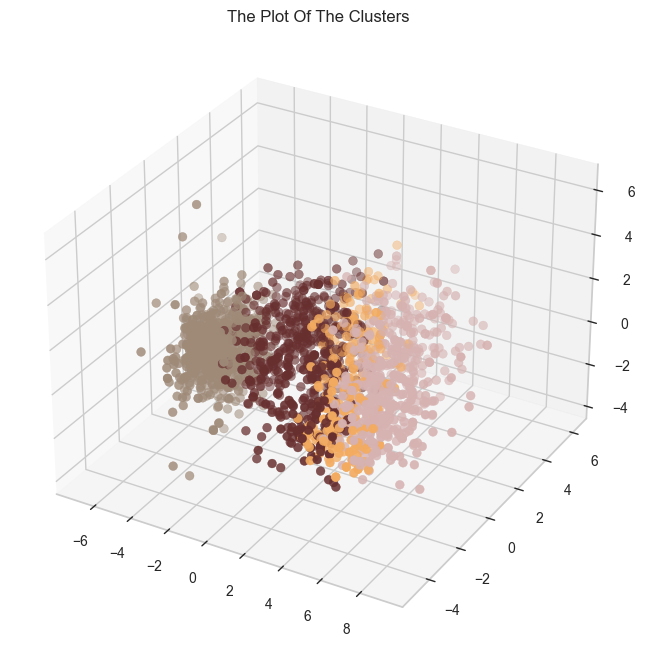

In [93]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

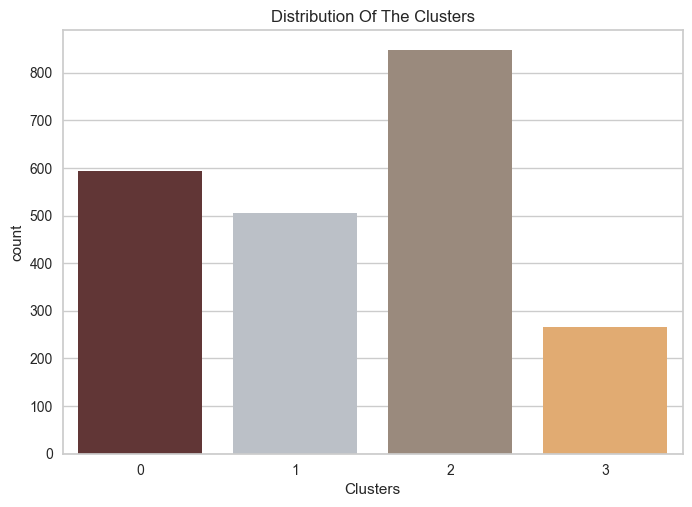

In [94]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [95]:
#A verifier
seg = {
    2: 'zappeur',
    0: 'fidele',
    1: 'habituel',
    3: 'potentiel'
}

data['segment_name'] = data['Clusters'].replace(seg, regex=True)
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Freqeuncy,Clusters,segment_name
0,0,58138.0,0,0,58,635,88,546,172,88,...,57283200000000000,64,1617,0,0,1,0,22,1,habituel
1,0,46344.0,1,1,38,11,1,6,2,1,...,9763200000000000,67,27,0,2,3,1,4,2,zappeur
2,0,71613.0,0,0,26,426,49,127,111,21,...,26956800000000000,56,776,1,0,2,0,20,1,habituel
3,0,26646.0,1,0,26,11,4,20,10,3,...,12009600000000000,37,53,1,1,3,1,6,2,zappeur
4,1,58293.0,1,0,94,173,43,118,46,27,...,13910400000000000,40,422,1,1,3,1,14,0,fidele


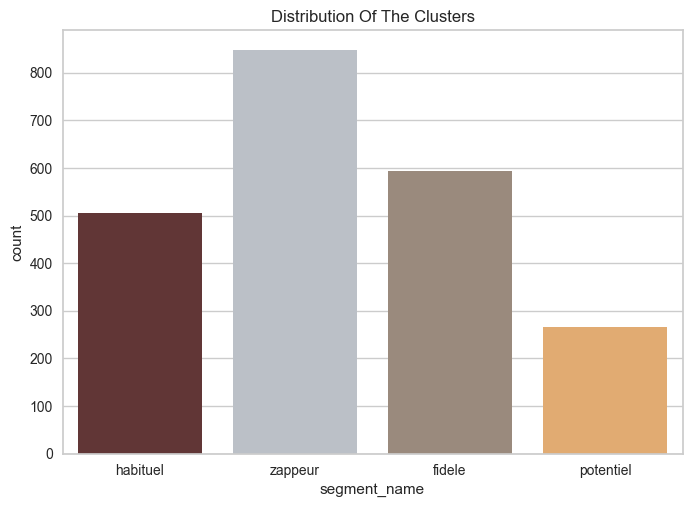

In [96]:
pl = sns.countplot(x=data["segment_name"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

The clusters seem to be fairly distributed.

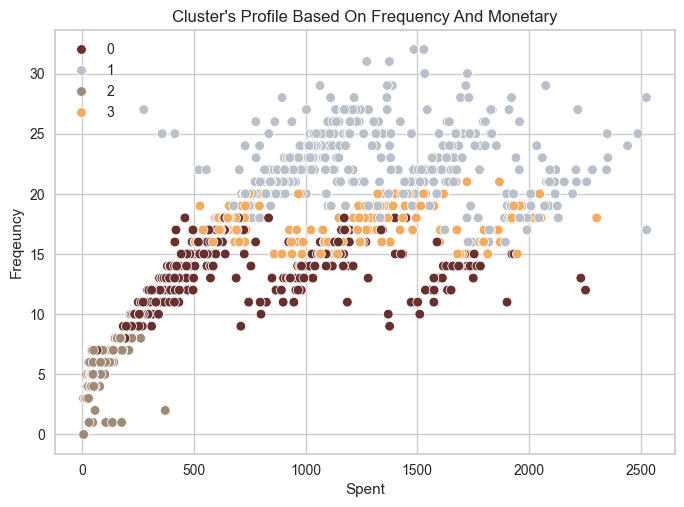

In [97]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Freqeuncy"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Frequency And Monetary")
plt.legend()
plt.show()

<a id="7"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">EVALUATING MODELS</p>


In [108]:
#Reading Pandas Dataframe from mlflow
all_experiments = [exp.experiment_id for exp in mlflow.search_experiments()]
df_mlflow = mlflow.search_runs(experiment_ids=all_experiments,filter_string="metrics.Silhouette_Score <1")
run_id = df_mlflow.loc[df_mlflow['metrics.Silhouette_Score'].idxmax()]['run_id']
print(run_id)

6a66ada8ec23402dabb9713a777af94c


In [109]:
df_mlflow

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.Silhouette_Score,params.locate_elbow,params.data_url,params.random_state,...,params.ax,params.copy_x,params.distance_metric,params.n_clusters,tags.mlflow.log-model.history,tags.mlflow.user,tags.mlflow.source.name,tags.mlflow.runName,tags.model,tags.mlflow.source.type
0,6a66ada8ec23402dabb9713a777af94c,0,FINISHED,mlflow-artifacts:/9d70f0a55fa0494eb6bcd91c89e6...,2023-10-11 23:54:13.616000+00:00,2023-10-11 23:54:45.653000+00:00,0.360903,True,D:\Users\ameni\OneDrive\Bureau\MLOPS Project\D...,None,...,"Axes(0.125,0.11;0.775x0.77)",True,euclidean,5,"[{""run_id"": ""6a66ada8ec23402dabb9713a777af94c""...",amenichaabouni248,c:\Users\acer\AppData\Local\Programs\Python\Py...,KMEANS,KMEANS,LOCAL
1,9ffb618f91754190ac488a35d835b8c1,0,FINISHED,mlflow-artifacts:/9d70f0a55fa0494eb6bcd91c89e6...,2023-10-11 23:51:56.507000+00:00,2023-10-11 23:52:31.432000+00:00,0.360903,True,D:\Users\ameni\OneDrive\Bureau\MLOPS Project\D...,None,...,"Axes(0.125,0.11;0.775x0.77)",True,euclidean,5,"[{""run_id"": ""9ffb618f91754190ac488a35d835b8c1""...",amenichaabouni248,c:\Users\acer\AppData\Local\Programs\Python\Py...,Agglomerative,Agglomerative,LOCAL


In [110]:
#let's call the model from the model registry ( in production stage)
import mlflow.pyfunc

logged_model = f'runs:/{run_id}/ML_models'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)
print(loaded_model)


mlflow.pyfunc.loaded_model:
  artifact_path: ML_models
  flavor: mlflow.sklearn
  run_id: 6a66ada8ec23402dabb9713a777af94c

